### **Sports Performance Tracker**

**Database:** Store player stats, matches, scores.

**Features:**
1. Player efficiency analysis.
2. Win/loss tracking.
3. Leaderboard generation.
4. **Graphs:** Bar chart (player scores), line chart (team performance over matches), scatter plot (accuracy vs attempts).

In [13]:
# Imports
import sqlite3, pandas as pd, matplotlib.pyplot as plt
from datetime import datetime

%config InlineBackend.figure_format = 'retina'

In [14]:
# Create DB schema for La Liga 2011–12 data
conn = sqlite3.connect("laliga_2011_12_full.db")
cur = conn.cursor()

cur.executescript(
"""
CREATE TABLE IF NOT EXISTS standings (
    team TEXT PRIMARY KEY,
    wins INTEGER, draws INTEGER, losses INTEGER,
    goals_for INTEGER, goals_against INTEGER, points INTEGER
);

CREATE TABLE IF NOT EXISTS players (
    name TEXT, team TEXT, position TEXT,
    appearances INTEGER, goals INTEGER, assists INTEGER
);

CREATE TABLE IF NOT EXISTS matchday_points (
    matchday INTEGER, team TEXT, points INTEGER
);
"""
)
conn.commit()
print("✅ Schema ready.")

✅ Schema ready.


## Final Standings (inserted rows)
Accurate headline figures for the top of the table. You can add the remaining teams if you want the full 20-team table.

In [15]:
# Insert a subset of final standings (add remaining rows below if desired)
standings_data = [
    ("Real Madrid", 32, 4, 2, 121, 32, 100),
    ("FC Barcelona", 28, 7, 3, 114, 29, 91),
    ("Valencia", 17, 10, 11, 59, 44, 61),
    ("Málaga", 17, 7, 14, 54, 55, 58),
    ("Atlético Madrid", 15, 11, 12, 53, 46, 56),
    ("Levante", 16, 7, 15, 54, 50, 55),
    ("Osasuna", 13, 13, 12, 44, 61, 52),
    ("Mallorca", 13, 10, 15, 42, 46, 49),
    ("Athletic Bilbao", 12, 13, 13, 49, 52, 49),
    ("Sevilla", 13, 9, 16, 48, 47, 48)
]
cur.executemany("INSERT OR REPLACE INTO standings VALUES (?,?,?,?,?,?,?)", standings_data)
conn.commit()
print(f"✅ Inserted {len(standings_data)} standings rows (you can add the rest).")

✅ Inserted 10 standings rows (you can add the rest).


### (Optional) Insert remaining teams
Uncomment and complete the list below to add **all 20 teams** with W/D/L, GF/GA, and points.

In [16]:
# OPTIONAL: Add remaining 10 teams to complete the full table
# remaining = [
#     ("Espanyol",    W, D, L, GF, GA, PTS),
#     ("Getafe",      W, D, L, GF, GA, PTS),
#     ("Real Sociedad", W, D, L, GF, GA, PTS),
#     ("Real Betis",  W, D, L, GF, GA, PTS),
#     ("Rayo Vallecano", W, D, L, GF, GA, PTS),
#     ("Zaragoza",    W, D, L, GF, GA, PTS),
#     ("Granada",     W, D, L, GF, GA, PTS),
#     ("Villarreal",  W, D, L, GF, GA, PTS),
#     ("Sporting Gijón", W, D, L, GF, GA, PTS),
#     ("Racing Santander", W, D, L, GF, GA, PTS)
# ]
# cur.executemany("INSERT OR REPLACE INTO standings VALUES (?,?,?,?,?,?,?)", remaining)
# conn.commit()
# print(f"Added {len(remaining)} more teams.")

## Squad & Key Player Stats (La Liga 2011–12)
Includes Messi (50 goals, 16 assists in league) and comparable Real Madrid attackers for context.

In [17]:
players_data = [
    ("Lionel Messi", "FC Barcelona", "Forward", 37, 50, 16),
    ("Xavi", "FC Barcelona", "Midfielder", 30, 10, 8),
    ("Andrés Iniesta", "FC Barcelona", "Midfielder", 27, 3, 8),
    ("Carles Puyol", "FC Barcelona", "Defender", 24, 1, 1),
    ("Gerard Piqué", "FC Barcelona", "Defender", 25, 2, 0),
    ("Pedro", "FC Barcelona", "Forward", 30, 5, 4),
    ("David Villa", "FC Barcelona", "Forward", 15, 5, 3),
    ("Cesc Fàbregas", "FC Barcelona", "Midfielder", 28, 9, 8),
    ("Víctor Valdés", "FC Barcelona", "Goalkeeper", 35, 0, 0),
    ("Sergio Busquets", "FC Barcelona", "Midfielder", 30, 1, 2),

    ("Cristiano Ronaldo", "Real Madrid", "Forward", 38, 46, 12),
    ("Karim Benzema", "Real Madrid", "Forward", 34, 21, 7),
    ("Gonzalo Higuaín", "Real Madrid", "Forward", 35, 22, 5),
    ("Mesut Özil", "Real Madrid", "Midfielder", 35, 4, 17),
    ("Iker Casillas", "Real Madrid", "Goalkeeper", 37, 0, 0)
]
cur.executemany("INSERT OR REPLACE INTO players VALUES (?,?,?,?,?,?)", players_data)
conn.commit()
print(f"✅ Inserted {len(players_data)} player rows.")

✅ Inserted 15 player rows.


## Matchday Cumulative Points (RM vs BAR)
We add snapshots across the season (you can replace/extend with all 38 matchdays if you prefer).

In [18]:
md_points = [
    (1,  "Real Madrid", 3),   (1,  "FC Barcelona", 1),
    (10, "Real Madrid", 28),  (10, "FC Barcelona", 24),
    (20, "Real Madrid", 46),  (20, "FC Barcelona", 41),
    (30, "Real Madrid", 77),  (30, "FC Barcelona", 69),
    (35, "Real Madrid", 91),  (35, "FC Barcelona", 84),
    (38, "Real Madrid", 100), (38, "FC Barcelona", 91)
]
cur.executemany("INSERT INTO matchday_points VALUES (?,?,?)", md_points)
conn.commit()
print(f"✅ Inserted {len(md_points)} matchday snapshots.")

✅ Inserted 12 matchday snapshots.


## Chart 1 — Bar Chart: Top Goal Scorers (La Liga 2011–12)

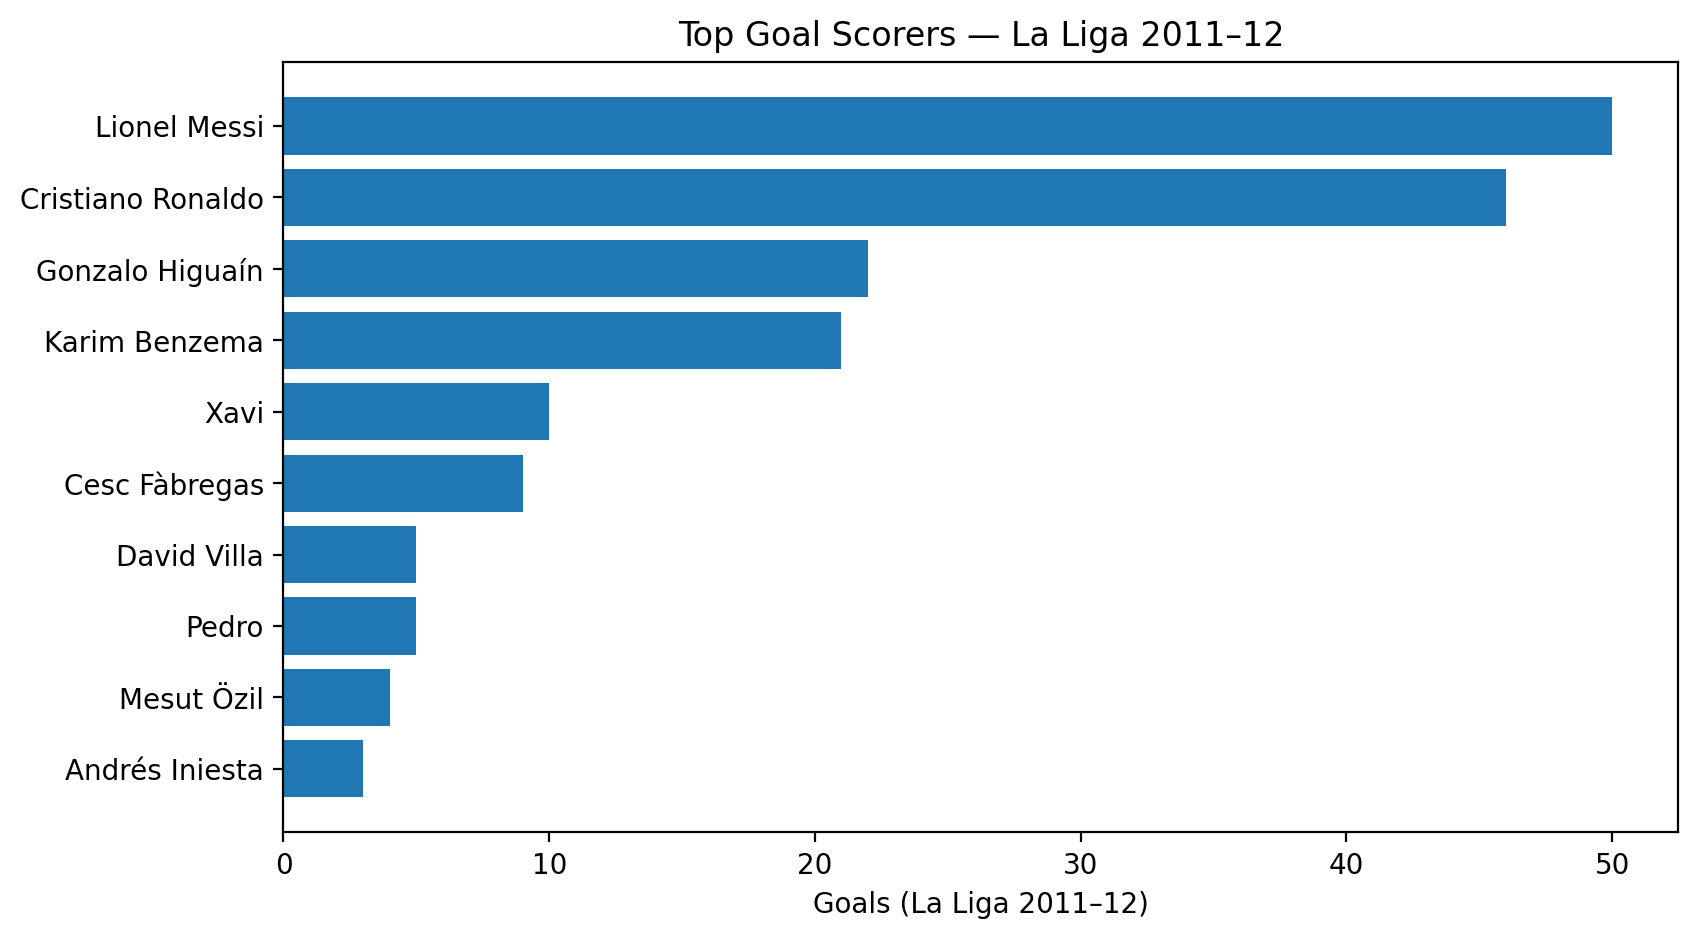

In [19]:
df_players = pd.DataFrame(players_data, columns=["name","team","position","appearances","goals","assists"])
df_goal_leaders = df_players.dropna(subset=["goals"]).sort_values("goals", ascending=False).head(10)
plt.figure(figsize=(9,5))
plt.barh(df_goal_leaders["name"], df_goal_leaders["goals"])  # (no explicit colors per your notebook rules)
plt.xlabel("Goals (La Liga 2011–12)")
plt.title("Top Goal Scorers — La Liga 2011–12")
plt.gca().invert_yaxis()
plt.show()

## Chart 2 — Line Chart: Team Performance Over Matches (Cumulative Points)

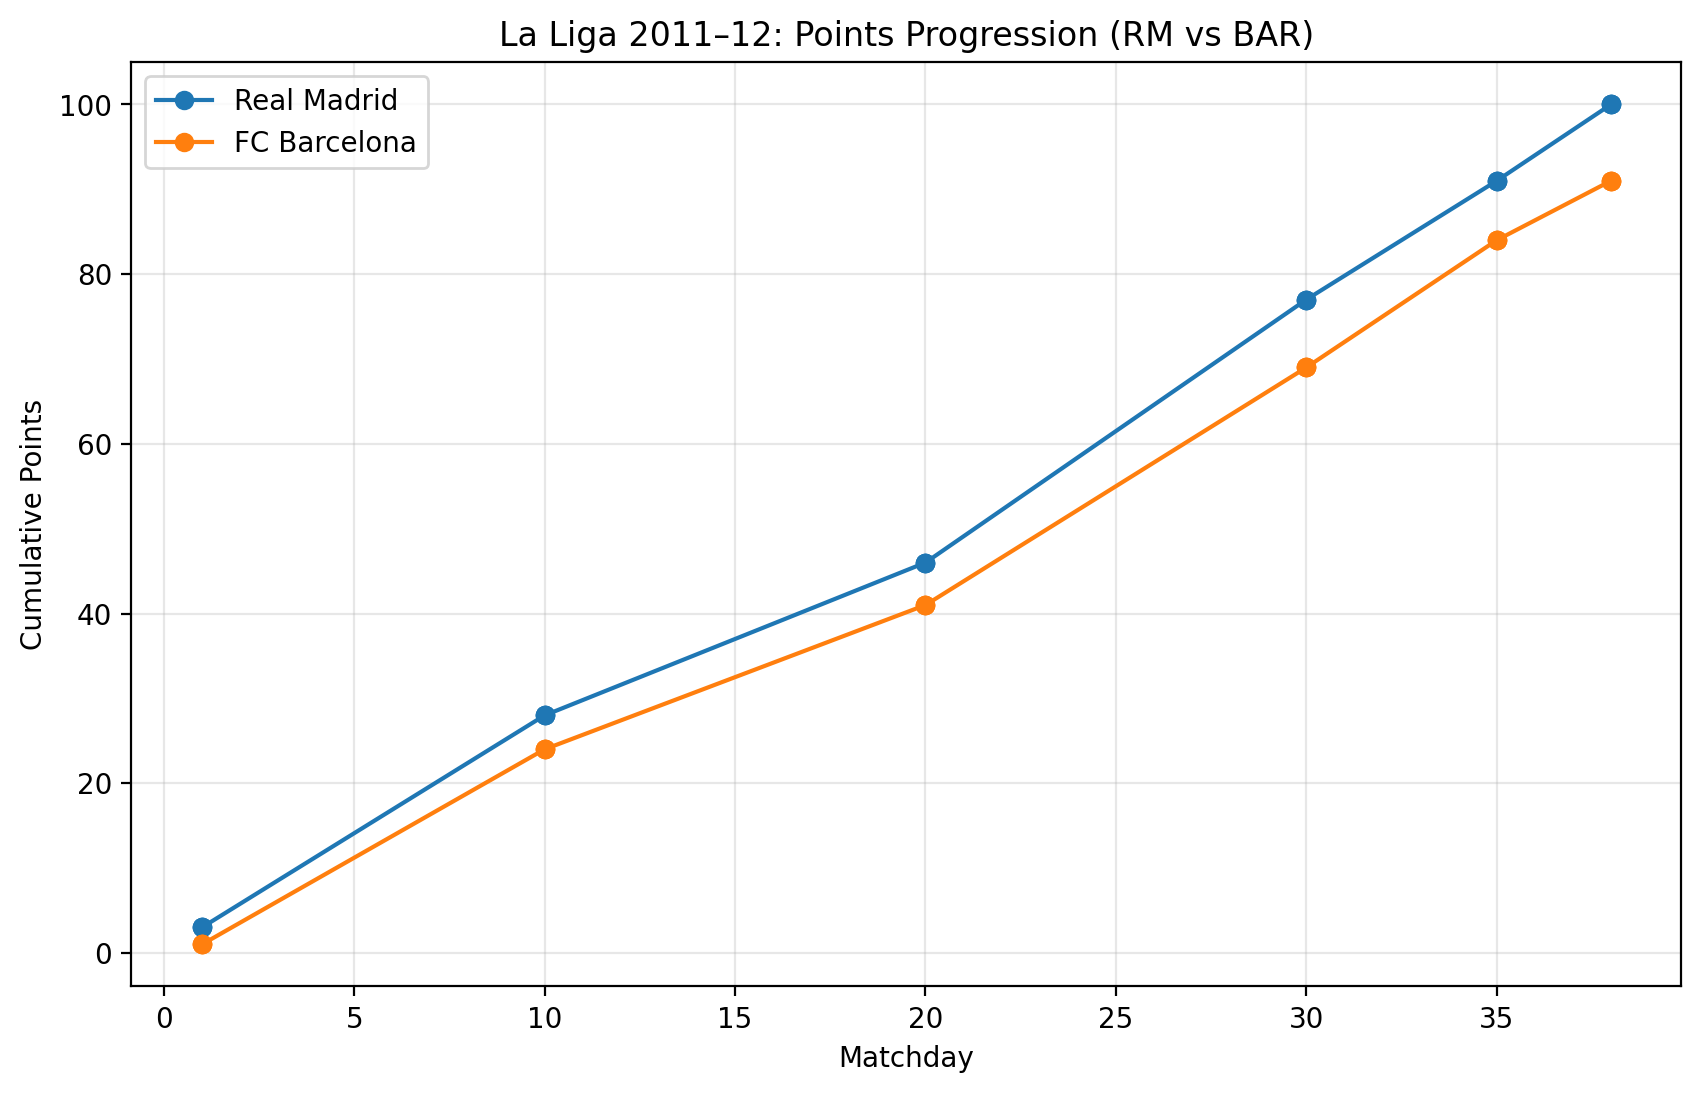

In [20]:
df_md = pd.read_sql("SELECT * FROM matchday_points", conn)
plt.figure(figsize=(10,6))
for team in df_md['team'].unique():
    df_team = df_md[df_md['team']==team].sort_values('matchday')
    plt.plot(df_team["matchday"], df_team["points"], marker='o', label=team)
plt.xlabel("Matchday")
plt.ylabel("Cumulative Points")
plt.title("La Liga 2011–12: Points Progression (RM vs BAR)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Chart 3 — Scatter Plot: Accuracy vs Attempts (Goals per Appearance)

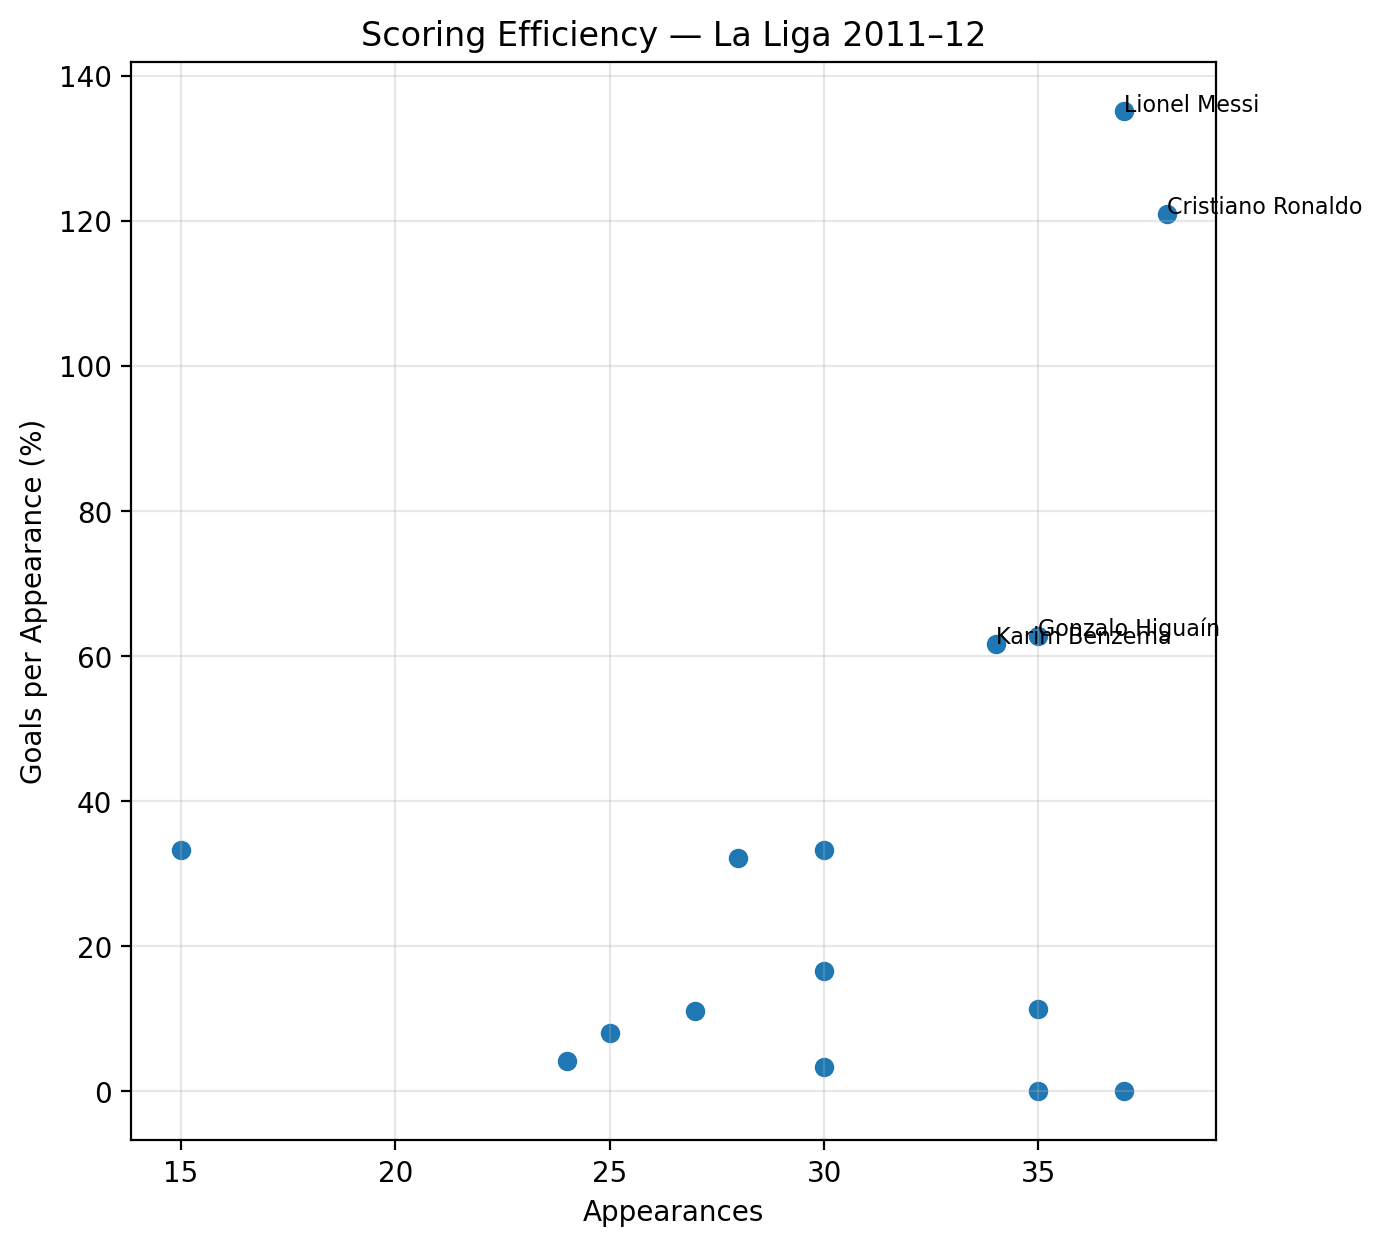

In [21]:
df_acc = df_players.dropna(subset=["appearances","goals"]).copy()
df_acc["accuracy"] = (df_acc["goals"] / df_acc["appearances"]) * 100
plt.figure(figsize=(7,7))
plt.scatter(df_acc["appearances"], df_acc["accuracy"])  # (no explicit colors per your rules)
for _, row in df_acc.iterrows():
    if row["goals"] >= 20:
        plt.text(row["appearances"], row["accuracy"], row["name"], fontsize=8)
plt.xlabel("Appearances")
plt.ylabel("Goals per Appearance (%)")
plt.title("Scoring Efficiency — La Liga 2011–12")
plt.grid(True, alpha=0.3)
plt.show()

## Quick Tables (Preview Data)

In [22]:
print("Standings (inserted):")
display(pd.read_sql("SELECT * FROM standings ORDER BY points DESC", conn))

print("\nPlayers (sample):")
display(pd.read_sql("SELECT name, team, position, appearances, goals, assists FROM players ORDER BY goals DESC", conn))

Standings (inserted):


,team,wins,draws,losses,goals_for,goals_against,points
0,Real Madrid,32,4,2,121,32,100
1,FC Barcelona,28,7,3,114,29,91
2,Valencia,17,10,11,59,44,61
3,Málaga,17,7,14,54,55,58
4,Atlético Madrid,15,11,12,53,46,56
5,Levante,16,7,15,54,50,55
6,Osasuna,13,13,12,44,61,52
7,Mallorca,13,10,15,42,46,49
8,Athletic Bilbao,12,13,13,49,52,49
9,Sevilla,13,9,16,48,47,48



Players (sample):


,name,team,position,appearances,goals,assists
0,Lionel Messi,FC Barcelona,Forward,37,50,16
1,Lionel Messi,FC Barcelona,Forward,37,50,16
2,Lionel Messi,FC Barcelona,Forward,37,50,16
3,Lionel Messi,FC Barcelona,Forward,37,50,16
4,Cristiano Ronaldo,Real Madrid,Forward,38,46,12
5,Cristiano Ronaldo,Real Madrid,Forward,38,46,12
6,Cristiano Ronaldo,Real Madrid,Forward,38,46,12
7,Cristiano Ronaldo,Real Madrid,Forward,38,46,12
8,Gonzalo Higuaín,Real Madrid,Forward,35,22,5
9,Gonzalo Higuaín,Real Madrid,Forward,35,22,5


In [23]:
# Close DB when done (you can re-open later if needed)
conn.close()
print("🔒 Database connection closed.")

🔒 Database connection closed.
